## Задание

Простые НС и метод обратного распространения ошибки
1. Реализовать полносвязную сеть: два скрытых слоя с функцией активации ReLU, на выходе softmax по количеству классов (задается как параметр).
2. Обучить НС на модельный датасет "make_moons" из skelarn. Визуализировать разделяющую поверхность.
3. Обучить НС на датасете MNIST.

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# ==================================
# 1. Build the model
# ==================================

In [4]:
def train_fun(n_hidden_1, n_hidden_2, out, train_x, train_y, epochs =10):
    model = Sequential()
#     model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(n_hidden_1, activation='relu'))
    model.add(Dense(n_hidden_2, input_dim=2, activation='relu'))
    model.add(Dense(out, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(train_x, train_y, batch_size=16, epochs=epochs)
    return model

In [5]:
# ==================================
# 2. Make moons classifier
# ==================================

In [6]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

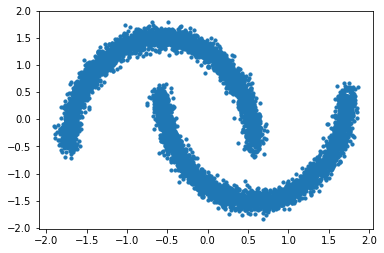

In [7]:
moons = datasets.make_moons(n_samples=10000, noise=.05)
x, y = moons
x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

plt.scatter(x_train[:, 0], x_train[:, 1], s=10);

In [8]:
res_moons = train_fun(100, 10, 2, x_train, y_train, 5)

W0817 15:22:42.847497 4506781120 deprecation_wrapper.py:119] From /Users/mary/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 15:22:42.897367 4506781120 deprecation_wrapper.py:119] From /Users/mary/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 15:22:42.935453 4506781120 deprecation_wrapper.py:119] From /Users/mary/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 15:22:42.941336 4506781120 deprecation_wrapper.py:119] From /Users/mary/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 15:22:43.011415 4506781120

Epoch 1/5
7000/7000 [==============================] - 1s 147us/step - loss: 0.2122 - acc: 0.9194
Epoch 2/5
7000/7000 [==============================] - 1s 97us/step - loss: 0.0187 - acc: 0.9990
Epoch 3/5
7000/7000 [==============================] - 1s 91us/step - loss: 0.0032 - acc: 1.0000
Epoch 4/5
7000/7000 [==============================] - 1s 117us/step - loss: 0.0013 - acc: 1.0000
Epoch 5/5
7000/7000 [==============================] - 1s 108us/step - loss: 6.6620e-04 - acc: 1.0000


In [9]:
test_loss, test_acc = res_moons.evaluate(x_test, y_test)
print('\nТочность на проверочных данных:', test_acc)

3000/3000 [==============================] - 0s 68us/step

Точность на проверочных данных: 1.0


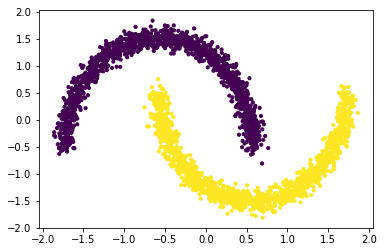

In [10]:
predictions = res_moons.predict(x_test)
plt.scatter(x_test[:, 0], x_test[:, 1], s=10, c=np.argmax(predictions, axis=1));

In [11]:
# ==================================
# 3. MNIST classifier
# ==================================

In [12]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

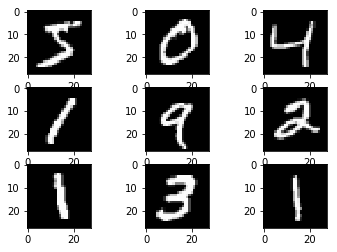

In [14]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')

Каждую картинку 28 на 28 переформируем в вектор длины 28*28=784, чтобы на вход модели подавать объекты - векторы. Затем отшкалируем: каждый элемент вектора (число от 0 до 255) переведем в отрезок [0, 1]

In [15]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
res_mnist = train_fun(100, 10, 10, x_train, y_train, 15)

Epoch 1/15
60000/60000 [==============================] - 11s 185us/step - loss: 0.2797 - acc: 0.9155
Epoch 2/15
60000/60000 [==============================] - 16s 270us/step - loss: 0.1142 - acc: 0.9661
Epoch 3/15
60000/60000 [==============================] - 21s 352us/step - loss: 0.0841 - acc: 0.9743
Epoch 4/15
60000/60000 [==============================] - 18s 301us/step - loss: 0.0660 - acc: 0.9801
Epoch 5/15
60000/60000 [==============================] - 20s 326us/step - loss: 0.0531 - acc: 0.9833
Epoch 6/15
60000/60000 [==============================] - 17s 288us/step - loss: 0.0427 - acc: 0.9869
Epoch 7/15
60000/60000 [==============================] - 19s 311us/step - loss: 0.0389 - acc: 0.9876
Epoch 8/15
60000/60000 [==============================] - 19s 314us/step - loss: 0.0316 - acc: 0.9904
Epoch 9/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.0273 - acc: 0.9909
Epoch 10/15
60000/60000 [==============================] - 19s 324us/step - loss: 

In [18]:
test_loss, test_acc = res_mnist.evaluate(x_test, y_test)
print('\nТочность на проверочных данных:', test_acc)

10000/10000 [==============================] - 1s 54us/step

Точность на проверочных данных: 0.9774


In [19]:
predictions = res_mnist.predict(x_test)
np.argmax(predictions, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

Images and predicted values


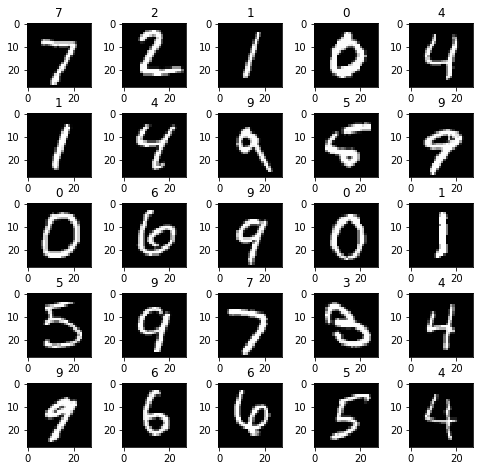

In [20]:
plt.figure(figsize=(8,8))
print('Images and predicted values')
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(wspace = 0.5)
    plt.imshow(np.reshape(x_test[i], (28,28)), cmap='gray')
    plt.title(np.argmax(predictions[i]))